In [1]:
import pygmt
import pandas as pd
import numpy as np
import scipy as sc
from matplotlib.path import Path
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
import xarray as xr
import verde as vd
# For projecting data
import pyproj
# For fetching sample datasets
#import ensaio
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from matplotlib.colors import LogNorm, PowerNorm
#import dask

# Load Moho Data from Receiver Function Studies

In [2]:
#Loading only Lat, Long, Moho_km
# Define file path
#path_to_data_file = r"D:\Amitava\Projects\Spline_Moho\Global_moho_compilation\Global_crust.csv"
path_to_data_file = r"D:\Amitava\Projects\Spline_Moho\Global_moho_compilation\Global_crust_Hk.csv" # dataset with only Hk

# Load only required columns while ignoring commented lines
#data_eq_raw = pd.read_csv(path_to_data_file, comment='#', usecols=["Lat", "Long", "Moho_km"])
data_eq_all = pd.read_csv(path_to_data_file, comment='#', usecols=["Lat", "Long", "Moho_km"])
'''
# Convert Moho_km to numeric, forcing non-numeric values to NaN
#data_eq_raw["Moho_km"] = pd.to_numeric(data_eq_raw["Moho_km"], errors="coerce")
data_eq["Moho_km"] = pd.to_numeric(data_eq_raw["Moho_km"], errors="coerce")

# Drop rows with NaN values in Moho_km
data_eq_all = data_eq_raw.dropna(subset=["Moho_km"]).reset_index(drop=True)

# Check for duplicate (Lat, Long, Moho_km) groups
duplicate_mask = data_eq_all.duplicated(subset=["Lat", "Long", "Moho_km"], keep=False)

# Count duplicate entries
num_duplicates = duplicate_mask.sum()
# Count unique groups that are duplicated
num_repeated_groups = data_eq_all.loc[duplicate_mask, ["Lat", "Long", "Moho_km"]].drop_duplicates().shape[0]

print(f"Total number of repeated (Lat, Long, Moho_km) rows: {num_duplicates}")
print(f"Number of unique (Lat, Long, Moho_km) groups that are repeated: {num_repeated_groups}")

# Keep only the first occurrence of each duplicate group
data_eq = data_eq_all.drop_duplicates(subset=["Lat", "Long", "Moho_km"], keep="first").reset_index(drop=True)
'''
# Display the final DataFrame

# Filter data based on longitude and latitude
data_eq_ind = data_eq_all[
    (data_eq_all["Long"] >= 65) & (data_eq_all["Long"] <= 110) & 
    (data_eq_all["Lat"] >= 5) & (data_eq_all["Lat"] <= 45)
].reset_index(drop=True)

data_eq = data_eq_all
eq_info = data_eq
data_eq

,Lat,Long,Moho_km
0,-90.00,0.00,38.0
1,-90.00,140.00,26.0
2,-89.93,144.36,40.0
3,-89.93,145.00,39.0
4,-87.42,-149.43,35.0
...,...,...,...
20879,78.92,11.94,27.0
20880,78.93,11.94,28.0
20881,80.05,-86.42,27.0
20882,81.60,-16.66,32.0


In [3]:
'''
# Count lines starting with '#'
num_commented_lines = sum(1 for line in open(path_to_data_file, 'r') if line.startswith('#'))

# Count NaN values in Moho_km
num_nans = data_eq_raw["Moho_km"].isna().sum()

print(f"Number of lines ignored due to comments: {num_commented_lines}")
print(f"Number of NaN values in Moho_km: {num_nans}")
'''

'\n# Count lines starting with \'#\'\nnum_commented_lines = sum(1 for line in open(path_to_data_file, \'r\') if line.startswith(\'#\'))\n\n# Count NaN values in Moho_km\nnum_nans = data_eq_raw["Moho_km"].isna().sum()\n\nprint(f"Number of lines ignored due to comments: {num_commented_lines}")\nprint(f"Number of NaN values in Moho_km: {num_nans}")\n'

In [4]:
#region = [65, 110, 5, 45]
region = [-180, 180, -90, 90]  # Covers the whole world
#region = [-180, 180, -89.9, 89.9] #avoids the poles
print(region)

[-180, 180, -90, 90]


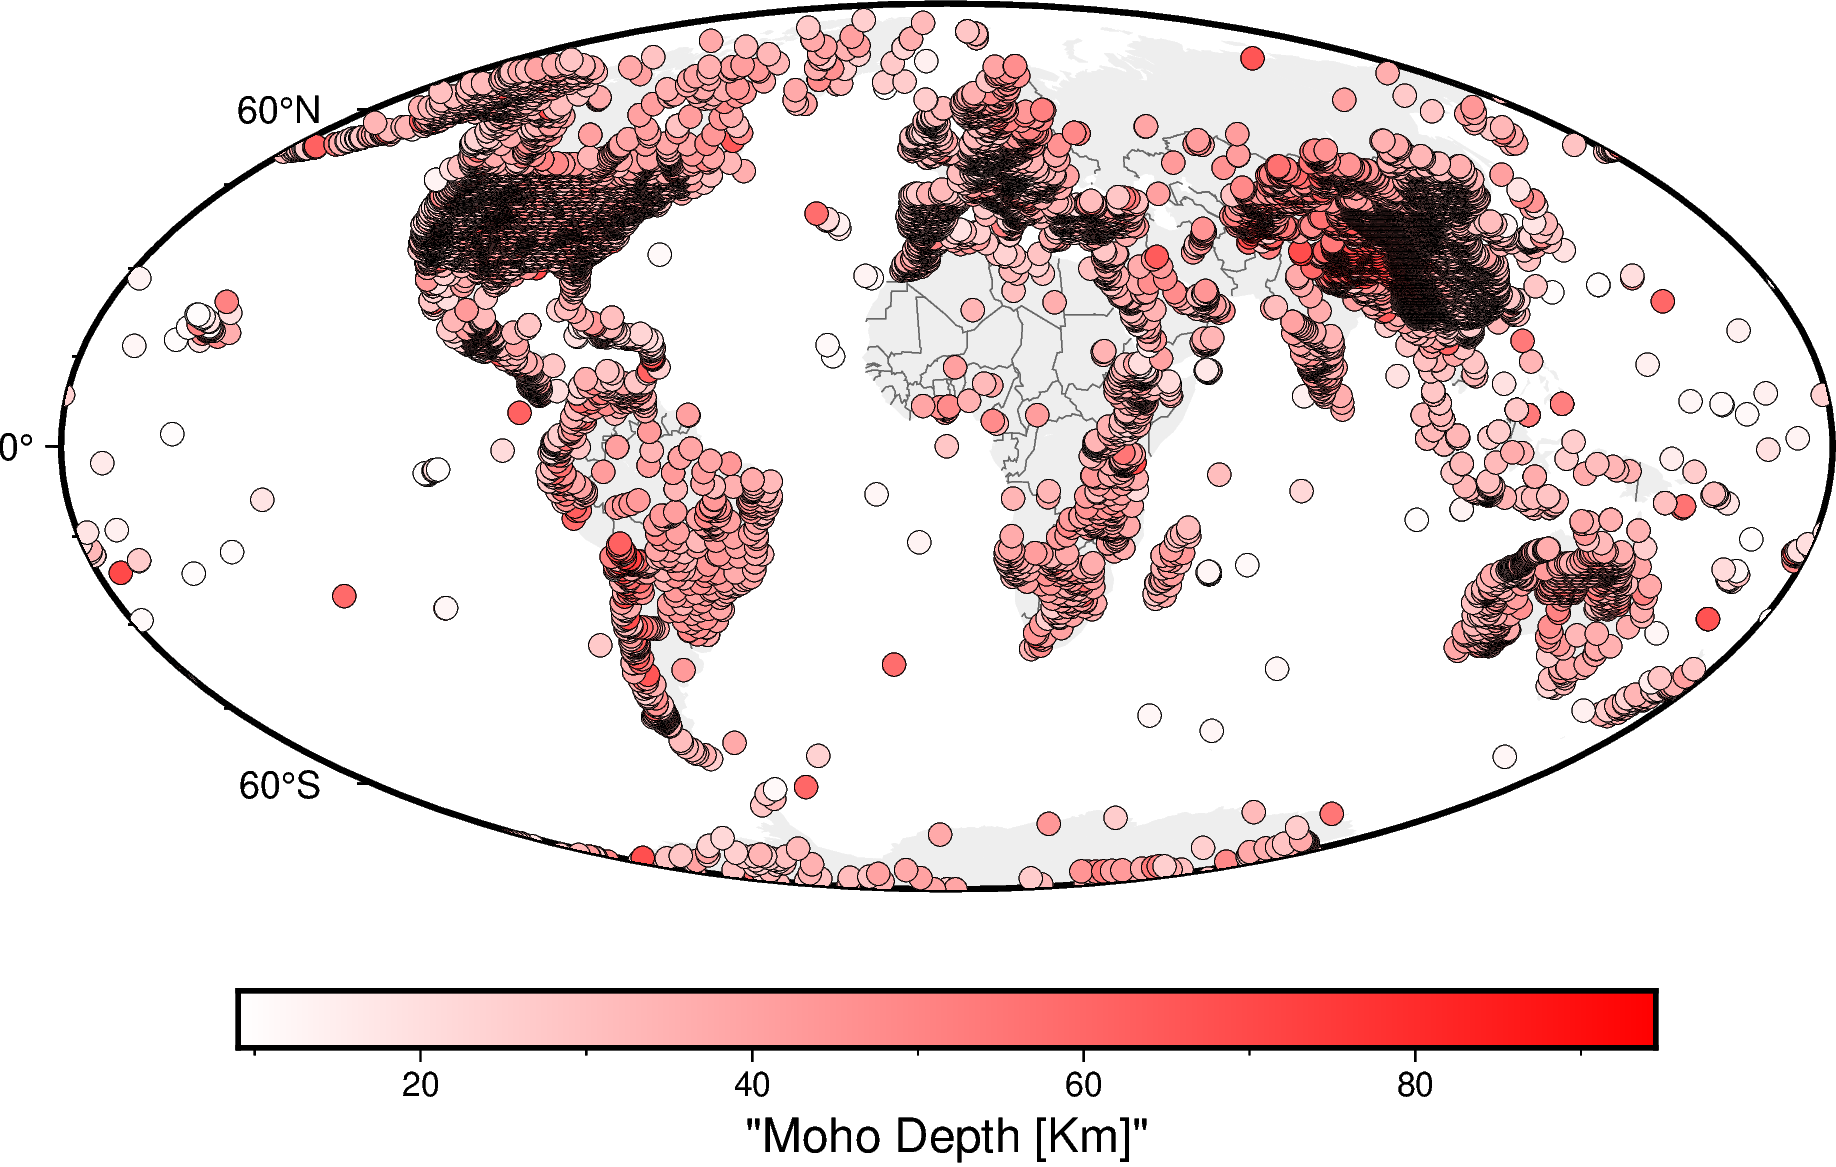

In [5]:

# Start a figure
fig = pygmt.Figure()
# Add a basemap with the data region, Mercator projection, default frame
# and ticks, color in the continents, and display national borders
fig.coast(
    region=region, projection="W15c", frame="af",
    land="#eeeeee", borders="1/#666666", area_thresh=1e4,
)
# Create a colormap for the Moho Depth
pygmt.makecpt(
    cmap="polar+h",
    series=[data_eq_all.Moho_km.min(), data_eq_all.Moho_km.max()],
    #series = [data.iloc[:, 5].min(), data.iloc[:, 5].max()],
)
# Plot colored points for the velocities
fig.plot(
    x=data_eq_all.Long,
    y=data_eq_all.Lat,
    fill=data_eq_all.Moho_km,
    style="c0.2c",
    cmap=True,
    pen="0.001p,black",
)
# Add a colorbar with automatic frame and ticks and a label
fig.colorbar(frame='af+l"Moho Depth [Km]"')
fig.show()


# Load Topography

## pyGMT

In [6]:
#topography =pygmt.datasets.load_earth_relief(resolution="01m", region="g")

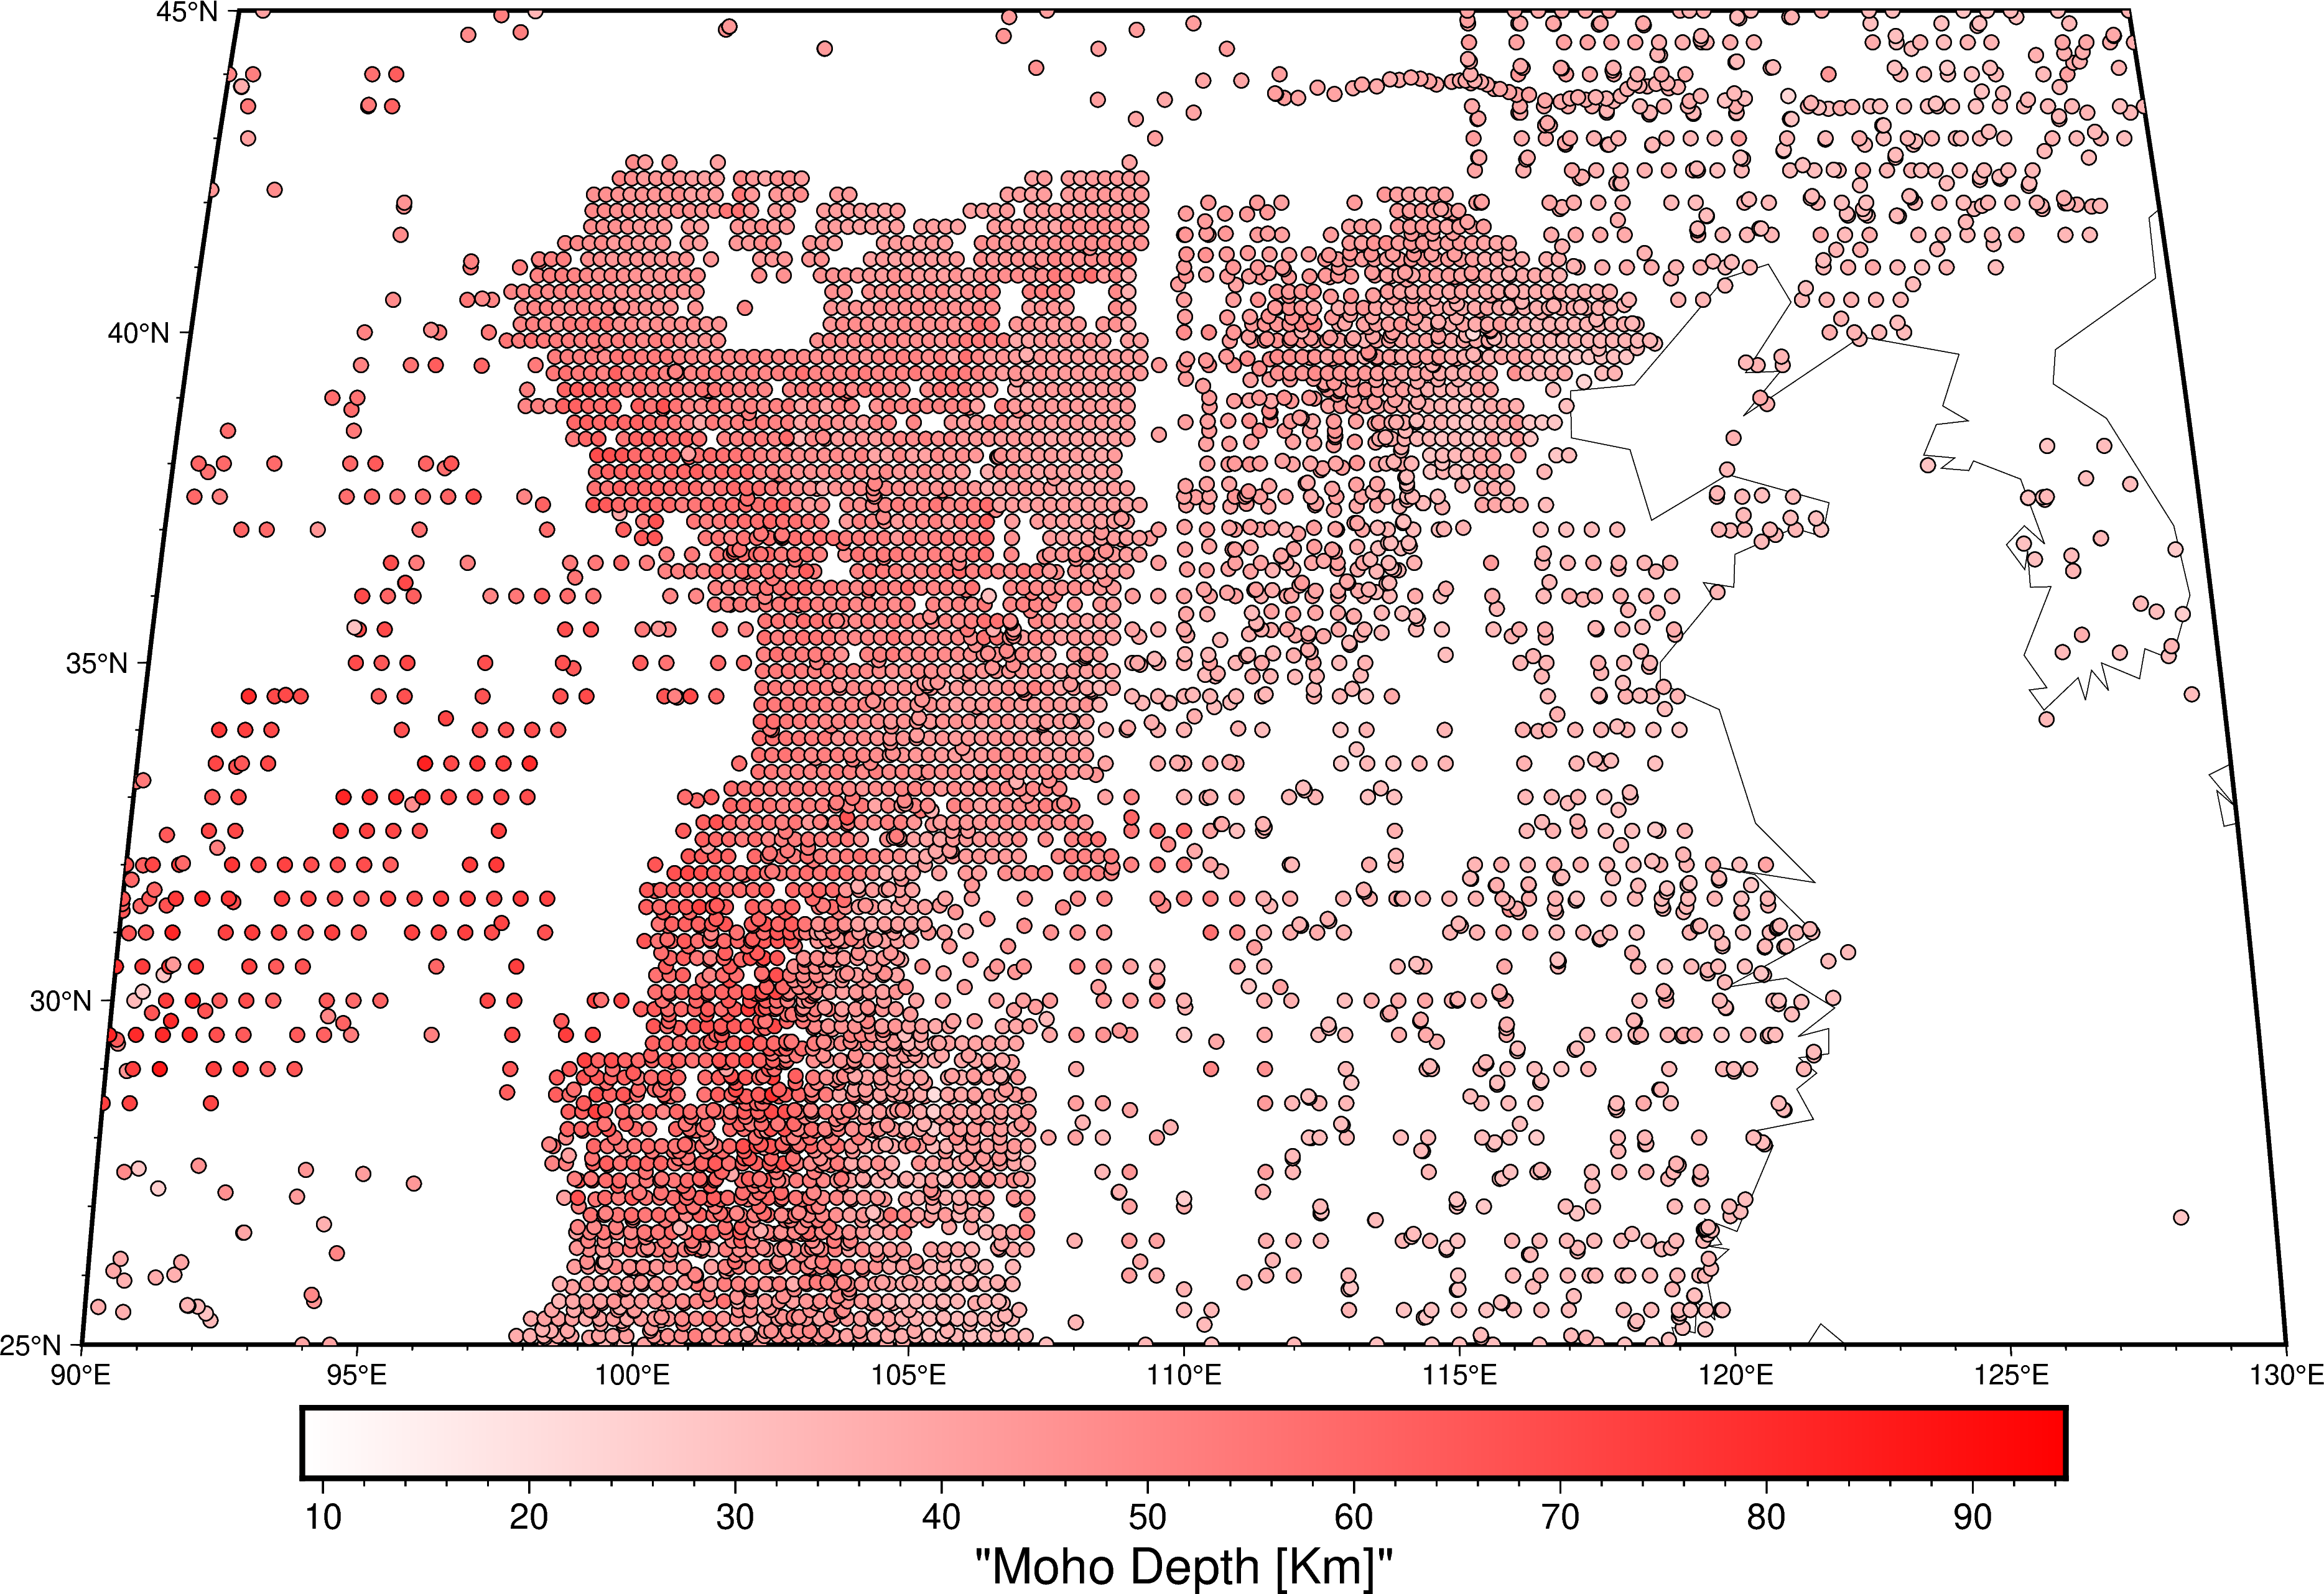

In [7]:
fig = pygmt.Figure()
fig.basemap(
    #region="g", # for the entire world
    region = [90, 130, 25, 45], #[Min Longitude, Max Longitude, Min Latitude, Max Latitude]
    projection="W30c",
    frame=True,
)
#fig.grdimage(data_topo, cmap="etopo1", shading="+nt0.5")
#fig.colorbar(frame='af+l"topography [m]"')
fig.coast(shorelines=True, resolution="c", area_thresh=1e4)
# Create a colormap for the Moho Depth
pygmt.makecpt(
    cmap="polar+h",
    series=[data_eq.Moho_km.min(), data_eq.Moho_km.max()],
    #series = [data.iloc[:, 5].min(), data.iloc[:, 5].max()],
)
# Plot colored points for the velocities
fig.plot(
    x=data_eq.Long,
    y=data_eq.Lat,
    fill=data_eq.Moho_km,
    style="c0.2c",
    cmap=True,
    pen="0.5p,black",
)
# Add a colorbar with automatic frame and ticks and a label
fig.colorbar(frame='af+l"Moho Depth [Km]"')
fig.show()
#fig.savefig("/home/amitava/Geodynamics-Project-IISERP/India_Tibet/RF_India/moho_depth_map.png", dpi=300)

# Load Crust1.0

In [8]:
#path_to_data_file_moho = "/home/amitava/Geodynamics-Project-IISERP/tomo/crust_ind.csv" ## for Ubuntu
#path_to_data_file_moho = r"D:\Amitava_Laptop\Geodynamics-Project-IISERP\tomo\crust.csv"
path_to_data_file_moho = r"D:\Amitava\Projects\Spline_Moho\Global_moho_compilation\Crust1.0\crust.csv"
#path_to_data_file_moho = "/home/amitava/Geodynamics-Project-IISERP/India_Tibet/RF_India/Crustal_thickness.csv"
#path_to_data_file = "/home/amitava/Geodynamics-Project-IISERP/India_Tibet/RF_India/TEC26522-mmc2_aug.csv"

# Read the file again with the extracted header
data_raw = pd.read_csv(path_to_data_file_moho, sep=r'\s+') ## sep is used instead of delim_whitespace = true as it will be removed in latest pandas
data_moho_all = data_raw.dropna()

# Apply the filtering criteria
data_moho_ind = data_moho_all[
    (data_moho_all["longitude"] >= 65) & (data_moho_all["longitude"] <= 110) & 
    (data_moho_all["latitude"] >= 5) & (data_moho_all["latitude"] <= 45)
].reset_index(drop=True)

data_moho = data_moho_all

crust1_moho = data_moho
data_moho

,longitude,latitude,Moho
0,-179.5,89.5,8.06
1,-178.5,89.5,8.08
2,-177.5,89.5,8.08
3,-176.5,89.5,8.09
4,-175.5,89.5,8.09
...,...,...,...
64795,175.5,-89.5,39.00
64796,176.5,-89.5,39.00
64797,177.5,-89.5,39.00
64798,178.5,-89.5,39.00


# Ensure numeric types for latitude and longitude

In [9]:
data_moho["longitude"] = pd.to_numeric(data_moho["longitude"], errors="coerce")
data_moho["latitude"] = pd.to_numeric(data_moho["latitude"], errors="coerce")
data_eq["Long"] = pd.to_numeric(data_eq["Long"], errors="coerce")
data_eq["Lat"] = pd.to_numeric(data_eq["Lat"], errors="coerce")

# Plotting Function

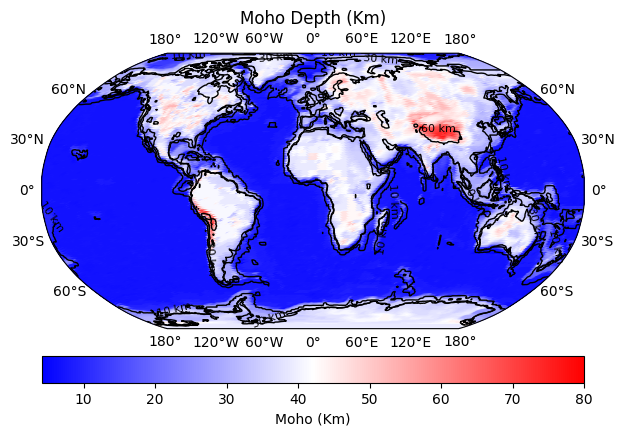

In [10]:
def plot_moho(coordinates, moho, title_data):
    "Plot Moho data on a single map with real contour lines"
    fig, ax = plt.subplots(
        figsize=(7, 7),
        subplot_kw=dict(projection=ccrs.Robinson())
    )

    crs = ccrs.PlateCarree()
    lon, lat = coordinates

    region = [lon.min(), lon.max(), lat.min(), lat.max()]
    ax.set_extent(region, crs=crs)
    ax.coastlines()
    ax.gridlines(draw_labels=True, crs=crs, alpha=0)
    ax.set_title(title_data)

    # Interpolate to grid
    xi = np.linspace(lon.min(), lon.max(), 300)
    yi = np.linspace(lat.min(), lat.max(), 300)
    xi, yi = np.meshgrid(xi, yi)
    #zi = griddata((lon, lat), moho, (xi, yi), method='linear')
    # Create the interpolator
    interp = sc.interpolate.NearestNDInterpolator(list(zip(lon, lat)), moho)

    # Interpolate and reshape to match the grid shape
    zi = interp(xi.ravel(), yi.ravel()).reshape(xi.shape)

    # Plot scatter data
    pc = ax.scatter(
        lon, lat,
        c=moho,
        s=30,
        cmap="bwr",
        vmin=np.nanmin(moho),
        vmax=np.nanmax(moho),
        transform=crs,
    )

    # Add real contour lines
    contours = ax.contour(
        xi, yi, zi,
        levels=[10, 30, 60],
        colors='k',
        linewidths=1,
        transform=crs
    )
    ax.clabel(contours, inline=True, fontsize=8, fmt='%d km')

    plt.colorbar(pc, ax=ax, orientation="horizontal", pad=0.05).set_label("Moho (Km)")
    return fig  # Return the figure to be handled later


# Example usage:
fig = plot_moho(
    (data_moho.longitude, data_moho.latitude),
    data_moho.Moho,
    "Moho Depth (Km)"
)
plt.show()

# Spline Interpolation

In [11]:
data = data_eq
coordinates=(data.Long, data.Lat)
moho=data.Moho_km
data
#print (moho)

,Lat,Long,Moho_km
0,-90.00,0.00,38.0
1,-90.00,140.00,26.0
2,-89.93,144.36,40.0
3,-89.93,145.00,39.0
4,-87.42,-149.43,35.0
...,...,...,...
20879,78.92,11.94,27.0
20880,78.93,11.94,28.0
20881,80.05,-86.42,27.0
20882,81.60,-16.66,32.0


# Projection, Coordinates, Region and Spacing

In [12]:
coordinates = (data.Long.values, data.Lat.values)
region = vd.get_region(coordinates)

# Use a Mercator projection for our Cartesian gridder
projection = pyproj.Proj(proj="merc", lat_ts=data.Lat.mean())
print(region)
print(coordinates)

# The output grid spacing will 6 arc-minutes. If n/60 then x arc minutes
#spacing = 6 / 60
spacing = 1

(np.float64(-179.42), np.float64(179.952), np.float64(-90.0), np.float64(82.5))
(array([  0.  , 140.  , 144.36, ..., -86.42, -16.66, -62.35]), array([-90.  , -90.  , -89.93, ...,  80.05,  81.6 ,  82.5 ]))


### Spline weighted

In [13]:
%%time
# This spline will automatically perform cross-validation and search for the optimal parameter configuration.
spline = vd.SplineCV(dampings=(1e-5, 1e-3))

spline.fit(projection(*coordinates), data.Moho_km)

# Spline Score and Dampings: Use only when usinge SplineCV otherwise comment the Score and Damping Prints
# We can show the best R² score obtained in the cross-validation
#print("\nScore: {:.3f}".format(spline.scores_.max())) # only for SplineCV

# And then the best damping parameter that produced this high score.
#print("\nBest damping:", spline.damping_) # only for SplineCV

# Now we can create a geographic grid of air temperature by providing a
# projection function to the grid method and mask points that are too far from
# the observations
grid_full = spline.grid(
    region=region,
    spacing=spacing,
    projection=projection,
    dims=["latitude", "longitude"],
    data_names="moho",
)

grid = vd.distance_mask(
    coordinates, maxdist=3 * spacing * 111e3, grid=grid_full, projection=projection
)

C:\Users\DELL\AppData\Local\Programs\Python\Python313\Lib\site-packages\verde\spline.py:245: FutureWarning: The mindist parameter of verde.Spline is no longer required and will be removed in Verde 2.0.0. Use the default value to obtain the future behavior.
  spline = Spline(**params)
C:\Users\DELL\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\base.py:129: FutureWarning: The mindist parameter of verde.Spline is no longer required and will be removed in Verde 2.0.0. Use the default value to obtain the future behavior.
  new_object = klass(**new_object_params)
C:\Users\DELL\AppData\Local\Programs\Python\Python313\Lib\site-packages\verde\model_selection.py:784: FutureWarning: The default scoring will change from R² to negative root mean squared error (RMSE) in Verde 2.0.0. This may change model selection results slightly.
  score = estimator.score(*test_data)
C:\Users\DELL\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\base.py:129: FutureWarning: The 

CPU times: total: 1h 8min 54s
Wall time: 5min 45s


In [14]:
grid_df = grid.to_dataframe().reset_index()
grid_full_df = grid_full.to_dataframe().reset_index()
# Optional: drop NaNs if there's a distance mask applied
spline_df = grid_full_df.dropna(subset=["moho"]).reset_index(drop=True)


spline_df

,latitude,longitude,moho
0,-90.0,-179.420000,46.123454
1,-90.0,-178.418964,46.092022
2,-90.0,-177.417928,46.060475
3,-90.0,-176.416891,46.028812
4,-90.0,-175.415855,45.997034
...,...,...,...
62275,82.5,175.947855,49.215299
62276,82.5,176.948891,49.139865
62277,82.5,177.949928,49.064150
62278,82.5,178.950964,48.988206


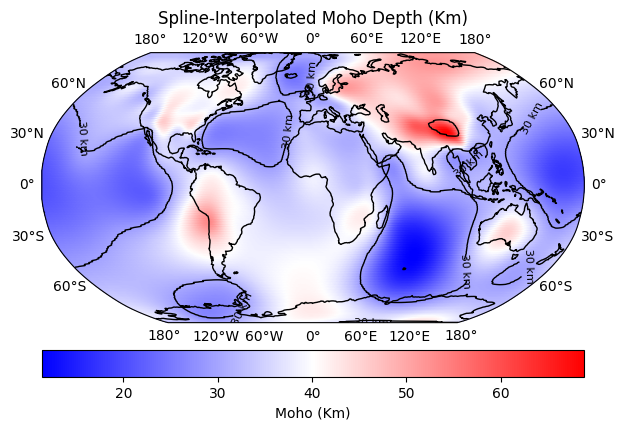

In [15]:
# Make sure there are no NaNs
#spline_df_clean = spline_df.dropna(subset=["moho"])

# Call your function with spline_df
fig = plot_moho(
    (spline_df.longitude, spline_df.latitude),
    spline_df.moho,
    "Spline-Interpolated Moho Depth (Km)"
)
plt.show()

In [16]:
grid

<xarray.Dataset> Size: 503kB
Dimensions:    (latitude: 173, longitude: 360)
Coordinates:
  * longitude  (longitude) float64 3kB -179.4 -178.4 -177.4 ... 179.0 180.0
  * latitude   (latitude) float64 1kB -90.0 -89.0 -87.99 ... 80.49 81.5 82.5
Data variables:
    moho       (latitude, longitude) float64 498kB nan nan nan ... nan nan nan
Attributes:
    metadata:  Generated by SplineCV(dampings=(1e-05, 0.001), mindists=[0])

In [17]:
grid

<xarray.Dataset> Size: 503kB
Dimensions:    (latitude: 173, longitude: 360)
Coordinates:
  * longitude  (longitude) float64 3kB -179.4 -178.4 -177.4 ... 179.0 180.0
  * latitude   (latitude) float64 1kB -90.0 -89.0 -87.99 ... 80.49 81.5 82.5
Data variables:
    moho       (latitude, longitude) float64 498kB nan nan nan ... nan nan nan
Attributes:
    metadata:  Generated by SplineCV(dampings=(1e-05, 0.001), mindists=[0])

In [18]:
spline

SplineCV(dampings=(1e-05, 0.001), mindists=[0])

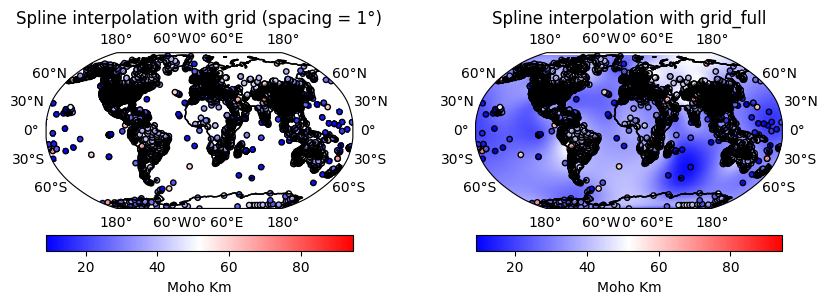

In [19]:
fig, axes = plt.subplots(
    1, 2, figsize=(9.5, 7), subplot_kw=dict(projection=ccrs.Robinson())
)
crs = ccrs.PlateCarree()
region = [
        data_moho.longitude.min(), data_moho.longitude.max(), 
        data_moho.latitude.min(), data_moho.latitude.max()
    ]
fig.subplots_adjust(wspace=0.4)  # Increase space (default is 0.2)
for ax in axes:
    ax.set_extent(region, crs=crs)  # Set region for both subplots
    ax.coastlines()  # Add coastlines
    #ax.add_feature(cfeature.BORDERS, linestyle=':')  # Add national boundaries
    gl = ax.gridlines(draw_labels=True, crs=crs, alpha=0)

# Plot Moho data in the first subplot
ax = axes[0]
ax.set_title(f"Spline interpolation with grid (spacing = {spacing}°)")
maxabs = np.nanmax(np.abs(moho))  
minabs = np.nanmin(np.abs(moho))
pc = grid.moho.plot.pcolormesh(
    ax=ax,
    cmap="bwr",
    vmin=minabs,
    vmax=maxabs,
    transform=crs,
    add_colorbar=False,
    add_labels=False,
)
plt.colorbar(pc, ax=ax, orientation="horizontal", pad=0.05).set_label("Moho Km")
ax.plot(data.Long, data.Lat, ".k", markersize=0.1, transform=crs)
ax.coastlines()

# Add scatter plot for Moho depths
scatter = ax.scatter(
    eq_info.Long,  # Ensure correct coordinate for longitude
    eq_info.Lat,   # Ensure correct coordinate for latitude
    c=eq_info.Moho_km,  # Moho depth values for coloring
    cmap='bwr',  # Color map
    s=15,  # Adjust size of the points
    edgecolors='black',  # Black edges for points
    vmin=minabs,  # Set vmin consistent with pcolormesh
    vmax=maxabs,  # Set vmax consistent with pcolormesh
    transform=crs  # Use Cartopy's coordinate system
)

# Print eq_info to check data
#print(eq_info)

# Add colorbar for the Moho depth
#cbar = plt.colorbar(sc, ax=ax, orientation="horizontal", pad=0.05)
#cbar.set_label("RF Moho Depth [Km]")

ax = axes[1]
ax.set_title("Spline interpolation with grid_full")
maxabs = np.nanmax(np.abs(moho))  
minabs = np.nanmin(np.abs(moho))
pc = grid_full.moho.plot.pcolormesh(
    ax=ax,
    cmap="bwr",
    vmin=minabs,
    vmax=maxabs,
    transform=crs,
    add_colorbar=False,
    add_labels=False,
)
plt.colorbar(pc, ax=ax, orientation="horizontal", pad=0.05).set_label("Moho Km")
ax.plot(data.Long, data.Lat, ".k", markersize=0.1, transform=crs)
ax.coastlines()

# Add scatter plot for Moho depths
scatter = ax.scatter(
    eq_info.Long,  # Ensure correct coordinate for longitude
    eq_info.Lat,   # Ensure correct coordinate for latitude
    c=eq_info.Moho_km,  # Moho depth values for coloring
    cmap='bwr',  # Color map
    s=15,  # Adjust size of the points
    edgecolors='black',  # Black edges for points
    vmin=minabs,  # Set vmin consistent with pcolormesh
    vmax=maxabs,  # Set vmax consistent with pcolormesh
    transform=crs  # Use Cartopy's coordinate system
)

#plt.colorbar(pc, ax=ax, orientation="horizontal", pad=0.05).set_label("Km")
ax.plot(data.Long, data.Lat, ".k", markersize=0.1, transform=crs)
ax.coastlines()
plt.show()

In [20]:
t=grid.moho.as_numpy()
p=grid_full.moho.as_numpy()

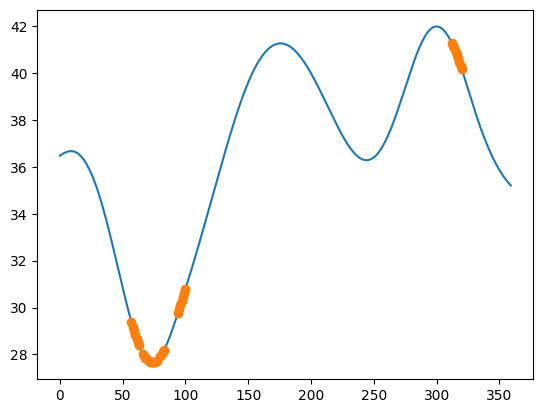

In [21]:
plt.plot(p.values[10])
plt.plot(t.values[10],'o')

# Weight Distribution

## Standard Deviation of Spline wrt RF

In [22]:
'''
# Extract coordinates and RF Moho values
rf_lat = data_eq.Lat.values
rf_lon = data_eq.Long.values
rf_moho = data_eq.Moho_km.values

# Interpolate the spline Moho values at RF locations
spline_moho = spline.predict(projection(rf_lon, rf_lat))


# Compute the overall standard deviation (STD) of the residuals (RF Moho - Spline Moho)
overall_std = np.std(rf_moho - spline_moho)

# Compute pointwise variance (squared error) for each data point
pointwise_variance = abs((rf_moho - spline_moho)) #** 2

# Create a new DataFrame with latitude, longitude, RF Moho, Spline Moho, and pointwise variance
df = pd.DataFrame({
    "latitude": rf_lat,
    "longitude": rf_lon,
    "rf_moho": rf_moho,
    "spline_moho": spline_moho,
    "err_moho": pointwise_variance  # Variance (squared error)
})

# Print summary
print(df)
print("\nOverall STD of Spline relative to RF Moho:", overall_std)
#df.to_csv("spline_data.csv", index=False)
'''

'\n# Extract coordinates and RF Moho values\nrf_lat = data_eq.Lat.values\nrf_lon = data_eq.Long.values\nrf_moho = data_eq.Moho_km.values\n\n# Interpolate the spline Moho values at RF locations\nspline_moho = spline.predict(projection(rf_lon, rf_lat))\n\n\n# Compute the overall standard deviation (STD) of the residuals (RF Moho - Spline Moho)\noverall_std = np.std(rf_moho - spline_moho)\n\n# Compute pointwise variance (squared error) for each data point\npointwise_variance = abs((rf_moho - spline_moho)) #** 2\n\n# Create a new DataFrame with latitude, longitude, RF Moho, Spline Moho, and pointwise variance\ndf = pd.DataFrame({\n    "latitude": rf_lat,\n    "longitude": rf_lon,\n    "rf_moho": rf_moho,\n    "spline_moho": spline_moho,\n    "err_moho": pointwise_variance  # Variance (squared error)\n})\n\n# Print summary\nprint(df)\nprint("\nOverall STD of Spline relative to RF Moho:", overall_std)\n#df.to_csv("spline_data.csv", index=False)\n'

In [23]:

# Extract coordinates and RF Moho values
rf_lat = data_eq.Lat.values
rf_lon = data_eq.Long.values
rf_moho = data_eq.Moho_km.values

# Create a new DataFrame with latitude, longitude, RF Moho, Spline Moho, and pointwise variance
df = pd.DataFrame({
    "latitude": rf_lat,
    "longitude": rf_lon,
    "rf_moho": rf_moho,
    
})

# Print summary
print(df)
#df.to_csv("spline_data.csv", index=False)


       latitude  longitude  rf_moho
0        -90.00       0.00     38.0
1        -90.00     140.00     26.0
2        -89.93     144.36     40.0
3        -89.93     145.00     39.0
4        -87.42    -149.43     35.0
...         ...        ...      ...
20879     78.92      11.94     27.0
20880     78.93      11.94     28.0
20881     80.05     -86.42     27.0
20882     81.60     -16.66     32.0
20883     82.50     -62.35     25.0

[20884 rows x 3 columns]


In [24]:
#plt.scatter(x=data_eq['Moho_km'][0:1000],y=spline_moho[0:1000])

In [25]:
'''
plt.figure(figsize=(8, 6))
plt.scatter(df["rf_moho"], df["spline_moho"], c=df["err_moho"], edgecolor="k")
plt.plot([df["rf_moho"].min(), df["rf_moho"].max()], [df["rf_moho"].min(), df["rf_moho"].max()], 'k--')  # 1:1 line
plt.colorbar(label="Absolute Error (km)")
plt.xlabel("RF Moho Depth (km)")
plt.ylabel("Spline Moho Depth (km)")
plt.title("Comparison of RF Moho and Spline Moho")
plt.grid(True)
plt.show()
'''

'\nplt.figure(figsize=(8, 6))\nplt.scatter(df["rf_moho"], df["spline_moho"], c=df["err_moho"], edgecolor="k")\nplt.plot([df["rf_moho"].min(), df["rf_moho"].max()], [df["rf_moho"].min(), df["rf_moho"].max()], \'k--\')  # 1:1 line\nplt.colorbar(label="Absolute Error (km)")\nplt.xlabel("RF Moho Depth (km)")\nplt.ylabel("Spline Moho Depth (km)")\nplt.title("Comparison of RF Moho and Spline Moho")\nplt.grid(True)\nplt.show()\n'

In [26]:
data_moho.head

<bound method NDFrame.head of        longitude  latitude   Moho
0         -179.5      89.5   8.06
1         -178.5      89.5   8.08
2         -177.5      89.5   8.08
3         -176.5      89.5   8.09
4         -175.5      89.5   8.09
...          ...       ...    ...
64795      175.5     -89.5  39.00
64796      176.5     -89.5  39.00
64797      177.5     -89.5  39.00
64798      178.5     -89.5  39.00
64799      179.5     -89.5  39.00

[64800 rows x 3 columns]>

In [27]:
#df_final['weighted_moho']

In [28]:
#plt.scatter(x=data_eq['Moho_km'][0:1000],y=df_final['weighted_moho'][0:1000])

In [29]:

# Create KDTree for RF locations (df is assumed to contain RF-based values)
#rf_tree = cKDTree(list(zip(df.longitude, df.latitude)))

# Assign RF Moho directly where RF exists (100% weight to RF)
df["weighted_moho"] = df["rf_moho"]
df["source"] = "RF"

# Create 1°x1° bins to find bins with no RF data
df["lat_bin"] = (df["latitude"] // 1)
df["lon_bin"] = (df["longitude"] // 1)
data_moho["lat_bin"] = (data_moho["latitude"] // 1)
data_moho["lon_bin"] = (data_moho["longitude"] // 1)

# Identify bins without RF data
rf_bins = set(zip(df["lat_bin"], df["lon_bin"]))
all_bins = set(zip(data_moho["lat_bin"], data_moho["lon_bin"]))
missing_rf_bins = all_bins - rf_bins

# Subset data_moho where RF data is missing
df_no_rf = data_moho[data_moho[["lat_bin", "lon_bin"]].apply(tuple, axis=1).isin(missing_rf_bins)].copy()
df_no_rf["weighted_moho"] = df_no_rf["Moho"]
df_no_rf["source"] = "Crust1.0"  # default source

'''
# KDTree for nearest spline_df points
spline_tree = cKDTree(list(zip(spline_df.longitude, spline_df.latitude)))
_, nearest_spline_idx = spline_tree.query(list(zip(df_no_rf.longitude, df_no_rf.latitude)))

# Get the nearest spline Moho values from precomputed spline_df
df_no_rf["nearest_rf_spline_moho"] = spline_df.moho.iloc[nearest_spline_idx].values
'''

# Nearest-neighbor interpolator for spline Moho values
nn_interp = sc.interpolate.NearestNDInterpolator(list(zip(spline_df.longitude, spline_df.latitude)),spline_df["moho"])

# Apply to df_no_rf coordinates
df_no_rf["nearest_rf_spline_moho"] = nn_interp(df_no_rf.longitude.values, df_no_rf.latitude.values)

# Compute difference
x = df_no_rf["nearest_rf_spline_moho"] - df_no_rf["weighted_moho"]
y = abs(x)

# Apply weighting logic with fixed 1.5 km threshold
updated_mask = y <= 1.5
df_no_rf.loc[updated_mask, "weighted_moho"] = (
    0.6 * df_no_rf.loc[updated_mask, "nearest_rf_spline_moho"] +
    0.4 * df_no_rf.loc[updated_mask, "weighted_moho"]
)
df_no_rf.loc[updated_mask, "source"] = "weighted spline and Crust1.0"

# Combine back with original RF-based data
df_final = pd.concat([df, df_no_rf], ignore_index=True)

# Rename columns if needed
df_final.rename(columns={"Lat": "latitude", "Long": "longitude"}, inplace=True)

# Save to CSV
df_final.to_csv("weighted_moho_with_source.csv", index=False)

# Output
print(df_final)


       latitude  longitude  rf_moho  weighted_moho    source  lat_bin  \
0        -90.00       0.00     38.0           38.0        RF    -90.0   
1        -90.00     140.00     26.0           26.0        RF    -90.0   
2        -89.93     144.36     40.0           40.0        RF    -90.0   
3        -89.93     145.00     39.0           39.0        RF    -90.0   
4        -87.42    -149.43     35.0           35.0        RF    -88.0   
...         ...        ...      ...            ...       ...      ...   
81102    -89.50     175.50      NaN           39.0  Crust1.0    -90.0   
81103    -89.50     176.50      NaN           39.0  Crust1.0    -90.0   
81104    -89.50     177.50      NaN           39.0  Crust1.0    -90.0   
81105    -89.50     178.50      NaN           39.0  Crust1.0    -90.0   
81106    -89.50     179.50      NaN           39.0  Crust1.0    -90.0   

       lon_bin  Moho  nearest_rf_spline_moho  
0          0.0   NaN                     NaN  
1        140.0   NaN         

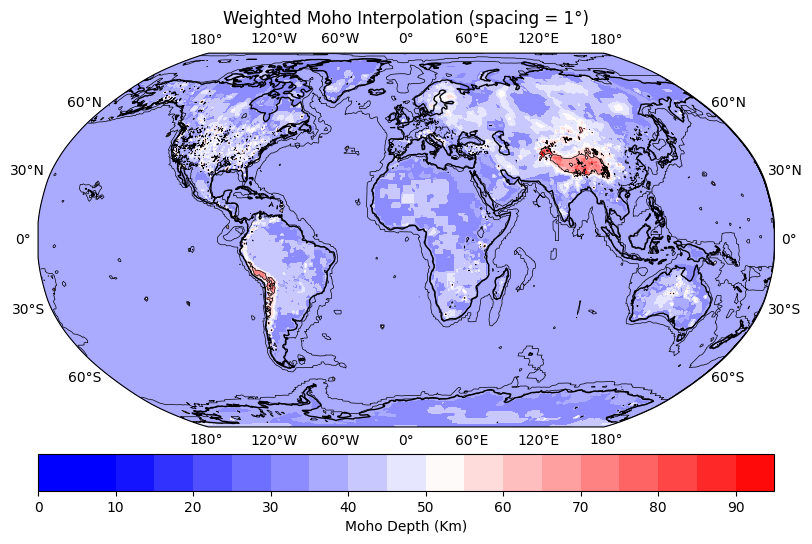

In [30]:

# Global
region = [
    data_moho.longitude.min(), data_moho.longitude.max(),
    data_moho.latitude.min(), data_moho.latitude.max()
]

fig, ax = plt.subplots(
    figsize=(9.5, 7),
    subplot_kw=dict(projection=ccrs.Robinson())
)
'''

# Local

region = [65, 110, 5, 45]

fig, ax = plt.subplots(
    figsize=(9.5, 7),
    subplot_kw=dict(projection=ccrs.Mercator())
)
'''
crs = ccrs.PlateCarree()

ax.set_extent(region, crs=crs)
ax.coastlines()
ax.gridlines(draw_labels=True, crs=crs, alpha=0)

ax.set_title(f"Weighted Moho Interpolation (spacing = {spacing}°)")
vmin = np.nanmin(df_final.weighted_moho)
vmax = np.nanmax(df_final.weighted_moho)

pc = ax.tricontourf(
    df_final.longitude, df_final.latitude, df_final.weighted_moho,
    cmap="bwr", levels=20, vmin=minabs, vmax=maxabs, transform=crs
)

ax.tricontour(
    df_final.longitude, df_final.latitude, df_final.weighted_moho,
    levels=[10,30,60], transform=crs, colors='black', linewidths=0.5
)

cbar = plt.colorbar(pc, ax=ax, orientation="horizontal", pad=0.05)
cbar.set_label("Moho Depth (Km)")
cbar.locator = MaxNLocator(integer=True)
cbar.update_ticks()
'''
pc_1 = ax.tricontour(
    df_final.longitude, df_final.latitude, df_final.weighted_moho,
    levels=[10, 40, 60],
    colors='black',         # make contours clearly visible
    linewidths=0.7,
    transform=crs
)

# Add earthquakes on the same plot
ax.scatter(
    eq_info.Long, eq_info.Lat, c=eq_info.Moho_km,
    cmap='bwr', s=5, edgecolors='black',
    vmin=minabs, vmax=maxabs, transform=crs
)
'''

plt.show()
fig.savefig(r"C:/Users/DELL/Pictures/Screenshots/final_moho_depth_map.png", dpi=300)


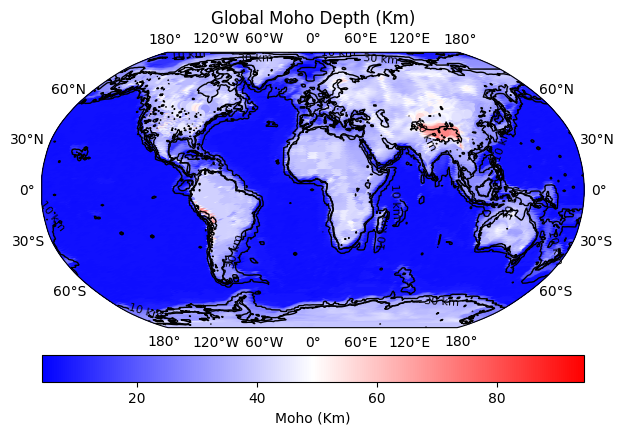

In [31]:
# Now call your unchanged function
fig = plot_moho(
    (df_final["longitude"], df_final["latitude"]),
    df_final["weighted_moho"],
    "Global Moho Depth (Km)"
)
fig.savefig(r"C:/Users/DELL/Pictures/Screenshots/map.png", dpi=300)
plt.show()

In [32]:
#df_moho_depth = df_final[["latitude", "longitude", "weighted_moho"]]
## Rename the final data
df_moho_depth = df_final[["latitude", "longitude", "weighted_moho"]].rename(
    columns={
        "latitude": "Latitude",
        "longitude": "Longitude",
        "weighted_moho": "Moho"
    }
)

df_moho_depth

,Latitude,Longitude,Moho
0,-90.00,0.00,38.0
1,-90.00,140.00,26.0
2,-89.93,144.36,40.0
3,-89.93,145.00,39.0
4,-87.42,-149.43,35.0
...,...,...,...
81102,-89.50,175.50,39.0
81103,-89.50,176.50,39.0
81104,-89.50,177.50,39.0
81105,-89.50,178.50,39.0


In [33]:
df_moho_depth.to_csv("moho_depth.csv", index=False)

In [34]:
ds = df_moho_depth.to_xarray()
print (ds)

<xarray.Dataset> Size: 3MB
Dimensions:    (index: 81107)
Coordinates:
  * index      (index) int64 649kB 0 1 2 3 4 5 ... 81102 81103 81104 81105 81106
Data variables:
    Latitude   (index) float64 649kB -90.0 -90.0 -89.93 ... -89.5 -89.5 -89.5
    Longitude  (index) float64 649kB 0.0 140.0 144.4 145.0 ... 177.5 178.5 179.5
    Moho       (index) float64 649kB 38.0 26.0 40.0 39.0 ... 39.0 39.0 39.0 39.0


# Data Points on Ocean

In [35]:
# Ensure your data has the right columns
# data_moho: columns ['Lat', 'Long', 'moho']
# data_eq: columns ['Lat', 'Long', 'Moho_km']

# Step 1: Build a KDTree from data_moho lat/lon
moho_coords = data_moho[["latitude", "longitude"]].to_numpy()
moho_tree = cKDTree(moho_coords)

# Step 2: Query nearest grid point in moho data within 1 degree
eq_coords = data_eq[["Lat", "Long"]].to_numpy()
distances, indices = moho_tree.query(eq_coords, distance_upper_bound=0.5)

# Step 3: Initialize a mask for valid matches
valid = distances != np.inf

# Get matched moho values only where distance ≤ 1°
matched_moho = np.full(len(data_eq), np.nan)
matched_moho[valid] = data_moho.iloc[indices[valid]]["Moho"].values

# Step 4: Compute absolute difference and filter >15 km
moho_diff = np.abs(data_eq["Moho_km"] - matched_moho)
mask = moho_diff > 30

# Step 5: Create final ocean_points DataFrame
ocean_points = data_eq[mask & valid].copy()

# Optional: add the difference column for inspection
ocean_points["Moho_diff_km"] = moho_diff[mask & valid]

# ocean_points now contains only points where Moho_km differs by >15 km from reference
# You can save or inspect:
# ocean_points.to_csv("moho_mismatch_ocean_points.csv", index=False)


NameError: name 'cKDTree' is not defined

In [ ]:

# Create figure
fig = pygmt.Figure()

# Define projection and region
fig.coast(
    region=region, projection="W15c", frame="af",
    land="#eeeeee", borders="1/#666666", area_thresh=1e4,
)

# Create colormap based on Moho depth
pygmt.makecpt(
    cmap="polar+h",
    series=[data_eq["Moho_km"].min(), data_eq["Moho_km"].max()],
)

# Plot Moho depth points with color scaling
fig.plot(
    x=ocean_points["Long"], 
    y=ocean_points["Lat"], 
    fill=ocean_points["Moho_km"],  # Color based on Moho depth
    style="c0.2c", 
    cmap=True, 
    pen="0.5p,black",
)

# Add a colorbar for reference
fig.colorbar(frame='af+l"Moho Depth (km)"')

# Show the plot
fig.show()
